In [1]:
data <- read.csv("new_chr4_static_classified.csv")
head(data,10)
# tail(data,10)
# head(read.csv("new_chr19_static_classified.csv"))

X,binID,start,cata,aRead,bRead,aNorm,bNorm
164200,chr4_3051000,3050900,3,83,126,51.234568,44.366197
74096,chr4_3051000,3050900,2,63,140,38.888889,49.295775
1,chr4_3051000,3050900,1,16,18,9.876543,6.338028
164201,chr4_3051200,3051100,3,474,620,75.238095,73.113208
74097,chr4_3051200,3051100,2,132,174,20.952381,20.518868
2,chr4_3051200,3051100,1,24,54,3.809524,6.367924
164202,chr4_3051300,3051200,3,119,182,46.484375,44.174757
74098,chr4_3051300,3051200,2,129,198,50.390625,48.058252
3,chr4_3051300,3051200,1,8,32,3.125000,7.766990
164203,chr4_3051500,3051400,3,47,66,62.666667,61.111111


In [2]:
high_sub <- data[data$cata == 3, c("binID", "start", "bRead")]
names(high_sub) <- c("binID", "start", "high")
# head(high_sub)
medium_sub <- data[data$cata == 2, c("binID", "start", "bRead")]
names(medium_sub) <- c("binID", "start", "medium")
# head(medium_sub)
low_sub <- data[data$cata == 1, c("binID", "start", "bRead")]
names(low_sub) <- c("binID", "start", "low")
# head(low_sub)

# merge
clusterdf <- merge(high_sub, medium_sub, all = TRUE)
clusterdf <- merge(clusterdf, low_sub, all = TRUE)
clusterdf <- clusterdf[order(as.numeric(clusterdf$start)),]
clusterdf[is.na(clusterdf)] <- 0
head(clusterdf,10)

,binID,start,high,medium,low
54420,chr4_3051000,3050900,126,140,18
54424,chr4_3051200,3051100,620,174,54
54425,chr4_3051300,3051200,182,198,32
54426,chr4_3051500,3051400,66,28,14
54434,chr4_3053200,3053100,286,194,34
54450,chr4_3059000,3058900,277,201,40
54457,chr4_3060200,3060100,134,46,5
54467,chr4_3062500,3062400,323,255,66
54491,chr4_3066700,3066600,48,48,20
54494,chr4_3067300,3067200,263,127,16


In [3]:
paste("Total number of Bins:", nrow(clusterdf))

[1] "Total number of Bins: 96756"

In [4]:
# write.csv(clusterdf, "A_clusterdf_count.csv")

In [5]:
dist_tolerance <- 100
# meth_tolerance <- 40 
# cor_2_cutoff <- 0.9
alpha <- 0.05

In [6]:
pre.row <- clusterdf[1,]

dist.fun <- function(row) {
    dist <- as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"]))
    pre.row <<- row
    return(c(row["binID"], row["start"], row["high"], row["medium"], row["low"], dist = dist)) 
}

dist.result <- t(apply(clusterdf, 1, dist.fun))
dist.result <- as.data.frame(dist.result)
head(dist.result, 30)

,binID,start,high,medium,low,dist
54420,chr4_3051000,3050900,126,140,18,0
54424,chr4_3051200,3051100,620,174,54,200
54425,chr4_3051300,3051200,182,198,32,100
54426,chr4_3051500,3051400,66,28,14,200
54434,chr4_3053200,3053100,286,194,34,1700
54450,chr4_3059000,3058900,277,201,40,5800
54457,chr4_3060200,3060100,134,46,5,1200
54467,chr4_3062500,3062400,323,255,66,2300
54491,chr4_3066700,3066600,48,48,20,4200
54494,chr4_3067300,3067200,263,127,16,600


In [7]:
dist.result <- dist.result[as.numeric(as.character(dist.result$dist)) <= dist_tolerance, ]
head(dist.result)

dist.result <- dist.result[-1,]
head(dist.result)
nrow(dist.result)

,binID,start,high,medium,low,dist
54420,chr4_3051000,3050900,126,140,18,0
54425,chr4_3051300,3051200,182,198,32,100
54511,chr4_3070600,3070500,90,21,11,100
54512,chr4_3070700,3070600,251,7,0,100
54546,chr4_3079200,3079100,0,43,4,100
54688,chr4_3115100,3115000,39,0,0,100


,binID,start,high,medium,low,dist
54425,chr4_3051300,3051200,182,198,32,100
54511,chr4_3070600,3070500,90,21,11,100
54512,chr4_3070700,3070600,251,7,0,100
54546,chr4_3079200,3079100,0,43,4,100
54688,chr4_3115100,3115000,39,0,0,100
54689,chr4_3115200,3115100,51,0,0,100


[1] 13470

In [8]:
start.pos <- dist.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   3051100   3051200   3070400   3070500   3070600   3079000   3079100
    [8]   3114900   3115000   3115100   3129100   3129200   3152600   3152700
   [15]   3155300   3155400   3177800   3177900   3181500   3181600   3193400
   [22]   3193500   3199800   3199900   3200000   3200400   3200500   3223900
   [29]   3224000   3224100   3240700   3240800   3252800   3252900   3254600
   [36]   3254700   3256200   3256300   3256400   3256600   3256700   3256800
   [43]   3256900   3257000   3257100   3266200   3266300   3280100   3280200
   [50]   3285400   3285500   3312500   3312600   3316800   3316900   3320700
   [57]   3320800   3330500   3330600   3330700   3330800   3331000   3331100
   [64]   3331200   3331500   3331600   3333200   3333300   3336400   3336500
   [71]   3336900   3337000   3337600   3337700   3338300   3338400   3338500
   [78]   3338600   3338700   3358000   3358100   3358200   3358600   3358700
   [85]   3358800   3362600   3362700   3363700   3363800   3367600   3367700
   [92]   3367800   3369800   3369900   3372000   3372100   3400000   3400100
   [99]   3400300   3400400   3403200   3403300   3416800   3416900   3424100
  [106]   3424200   3442100   3442200   3443500   3443600   3443700   3452900
  [113]   3453000   3456800   3456900   3458100   3458200   3463800   3463900
  [120]   3464000   3479600   3479700   3482500   3482600   3483900   3484000
  [127]   3484100   3485900   3486000   3487300   3487400   3488600   3488700
  [134]   3488800   3498100   3498200   3500100   3500200   3500900   3501000
  [141]   3510700   3510800   3599300   3599400   3627400   3627500   3627600
  [148]   3636000   3636100   3636200   3636500   3636600   3636700   3659700
  [155]   3659800   3668400   3668500   3679500   3679600   3680800   3680900
  [162]   3719900   3720000   3720200   3720300   3730000   3730100   3738000
  [169]   3738100   3753700   3753800   3757100   3757200   3770700   3770800
  [176]   3776900   3777000   3803500   3803600   3870600   3870700   3874600
  [183]   3874700   3874800   3887500   3887600   3902800   3902900   3962800
  [190]   3962900   3966800   3966900   3967200   3967300   3971500   3971600
  [197]   3973400   3973500   3973600   3976200   3976300   3981400   3981500
  [204]   3985200   3985300   3991200   3991300   4028700   4028800   4039700
  [211]   4039800   4046200   4046300   4048200   4048300   4048900   4049000
  [218]   4049100   4049200   4049300   4049400   4121500   4121600   4121700
  [225]   4122700   4122800   4165500   4165600   4166500   4166600   4167000
  [232]   4167100   4180600   4180700   4202300   4202400   4237800   4237900
  [239]   4238000   4238400   4238500   4268700   4268800   4269500   4269600
  [246]   4297900   4298000   4300200   4300300   4300400   4300600   4300700
  [253]   4340400   4340500   4341400   4341500   4341700   4341800   4343500
  [260]   4343600   4343700   4343900   4344000   4344100   4395300   4395400
  [267]   4401100   4401200   4437200   4437300   4439100   4439200   4439300
  [274]   4457300   4457400   4458700   4458800   4460500   4460600   4463100
  [281]   4463200   4507700   4507800   4511100   4511200   4511300   4561400
  [288]   4561500   4576200   4576300   4576400   4582400   4582500   4639900
  [295]   4640000   4640100   4652200   4652300   4657300   4657400   4660300
  [302]   4660400   4661500   4661600   4723100   4723200   4723800   4723900
  [309]   4741000   4741100   4746000   4746100   4819100   4819200   4819300
  [316]   4819400   4850400   4850500   4890100   4890200   4904900   4905000
  [323]   4909300   4909400   4912300   4912400   4912900   4913000   4940900
  [330]   4941000   4964600   4964700   4965400   4965500   4977100   4977200
  [337]   4979600   4979700   5006600   5006700   5016300   5016400   5016500
  [344]   5045100   5045200   5045300   5045400   5045500   5045700   5045800
  [351]   5071400   5071500   5096800   5096900   5099100   5099200   5146800
  [358]   5146900   517940

In [9]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
dist.result <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
54424,chr4_3051200,3051100,620,174,54
54425,chr4_3051300,3051200,182,198,32
54510,chr4_3070500,3070400,63,46,19
54511,chr4_3070600,3070500,90,21,11
54512,chr4_3070700,3070600,251,7,0
54545,chr4_3079100,3079000,555,44,0
54546,chr4_3079200,3079100,0,43,4
54687,chr4_3115000,3114900,53,0,0
54688,chr4_3115100,3115000,39,0,0
54689,chr4_3115200,3115100,51,0,0


In [10]:
pre.row <- dist.result[1,]

test.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = "0"))
    } else {
        test.matrix <- cbind(c(as.numeric(as.character(pre.row["high"])),
                               as.numeric(as.character(pre.row["medium"])),
                               as.numeric(as.character(pre.row["low"]))),
                             c(as.numeric(as.character(row["high"])), 
                               as.numeric(as.character(row["medium"])),
                               as.numeric(as.character(row["low"]))))
        test.matrix <- test.matrix[rowSums(test.matrix) > 0, ]
        value <- suppressWarnings(chisq.test(test.matrix)$p.value)
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = as.character(value)))
    }
}

test.result <- apply(dist.result[-1,], MARGIN = 1, FUN = test.fun)
test.result <- t(test.result)
test.result <- as.data.frame(test.result)
head(test.result)

,binID,start,p.value
54425,chr4_3051300,3051200,2.7434035509562e-24
54510,chr4_3070500,3070400,0
54511,chr4_3070600,3070500,0.000320434358518883
54512,chr4_3070700,3070600,5.10443869385835e-12
54545,chr4_3079100,3079000,0
54546,chr4_3079200,3079100,5.28010190524123e-71


In [11]:
good.result <- test.result[as.numeric(as.character(test.result$p.value)) > alpha,]
head(good.result)

,binID,start,p.value
54688,chr4_3115100,3115000,0.144399792213071
54689,chr4_3115200,3115100,0.205903210732068
55198,chr4_3193600,3193500,0.569157439638811
55258,chr4_3200000,3199900,0.136088734209974
55506,chr4_3224100,3224000,0.527151587810914
55705,chr4_3240900,3240800,0.260925522506053


In [12]:
start.pos <- good.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   3114900   3115000   3115100   3193400   3193500   3199800   3199900
   [8]   3223900   3224000   3240700   3240800   3254600   3254700   3256300
  [15]   3256400   3256800   3256900   3257000   3257100   3266200   3266300
  [22]   3280100   3280200   3316800   3316900   3320700   3320800   3331500
  [29]   3331600   3333200   3333300   3336900   3337000   3337600   3337700
  [36]   3338300   3338400   3338500   3400300   3400400   3443500   3443600
  [43]   3483900   3484000   3484100   3498100   3498200   3636000   3636100
  [50]   3636200   3636600   3636700   3680800   3680900   3738000   3738100
  [57]   3902800   3902900   3991200   3991300   4039700   4039800   4049100
  [64]   4049200   4049300   4049400   4121600   4121700   4122700   4122800
  [71]   4167000   4167100   4202300   4202400   4237800   4237900   4238000
  [78]   4238400   4238500   4268700   4268800   4297900   4298000   4300200
  [85]   4300300   4300400   4340400   4340500   4341400   4341500   4341700
  [92]   4341800   4343500   4343600   4343700   4395300   4395400   4401100
  [99]   4401200   4458700   4458800   4511200   4511300   4561400   4561500
 [106]   4576300   4576400   4582400   4582500   4652200   4652300   4657300
 [113]   4657400   4723800   4723900   4819300   4819400   4850400   4850500
 [120]   4909300   4909400   4912900   4913000   4940900   4941000   4979600
 [127]   4979700   5006600   5006700   5045200   5045300   5045400   5096800
 [134]   5096900   5260900   5261000   5261100   5263400   5263500   5330700
 [141]   5330800   5374100   5374200   5463800   5463900   5465100   5465200
 [148]   5575700   5575800   5578200   5578300   5672000   5672100   5682900
 [155]   5683000   5797800   5797900   5799400   5799500   5820500   5820600
 [162]   5999400   5999500   6000300   6000400   6039400   6039500   6149000
 [169]   6149100   6154700   6154800   6176300   6176400   6191300   6191400
 [176]   6272700   6272800   6272900   6314400   6314500   6327900   6328000
 [183]   6362800   6362900   6366000   6366100   6444000   6444100   6649600
 [190]   6649700   6649800   6649900   6685500   6685600   6685800   6685900
 [197]   6718300   6718400   6753800   6753900   6835100   6835200   6839900
 [204]   6840000   6891900   6892000   6989500   6989600   7061400   7061500
 [211]   7098400   7098500   7098600   7101500   7101600   7101700   7101800
 [218]   7101900   7133500   7133600   7165400   7165500   7170000   7170100
 [225]   7204800   7204900   7301900   7302000   7302100   7322700   7322800
 [232]   7326800   7326900   7625300   7625400   7625500   7625600   7650700
 [239]   7650800   7651500   7651600   7651900   7652000   7660200   7660300
 [246]   7666100   7666200   7694500   7694600   7702700   7702800   7703200
 [253]   7703300   7713300   7713400   7759700   7759800   7834800   7834900
 [260]   7835400   7835500   7869700   7869800   7879200   7879300   7879900
 [267]   7880000   7937300   7937400   7937500   7946000   7946100   7946200
 [274]   7990200   7990300   7997200   7997300   8117900   8118000   8119300
 [281]   8119400   8123300   8123400   8123500   8181000   8181100   8297700
 [288]   8297800   8297900   8298000   8298100   8302900   8303000   8305600
 [295]   8305700   8314000   8314100   8314800   8314900   8394800   8394900
 [302]   8395000   8443200   8443300   8443400   8443500   8443600   8462400
 [309]   8462500   8465300   8465400   8601600   8601700   8601800   8601900
 [316]   8602000   8647900   8648000   8661600   8661700   8661800   8661900
 [323]   8738900   8739000   8750500   8750600   8762900   8763000   8824900
 [330]   8825000   8834700   8834800   8844400   8844500   8844600   8898400
 [337]   8898500   8910200   8910300   8919500   8919600   8943200   8943300
 [344]   9012600   9012700   9033700   9033800   9033900   9085400   9085500
 [351]   9090300   9090400   9090500   9131600   9131700   9133300   9133400
 [358]   9151000   9151100   9182500   9182600   9206600   9206700   9212000

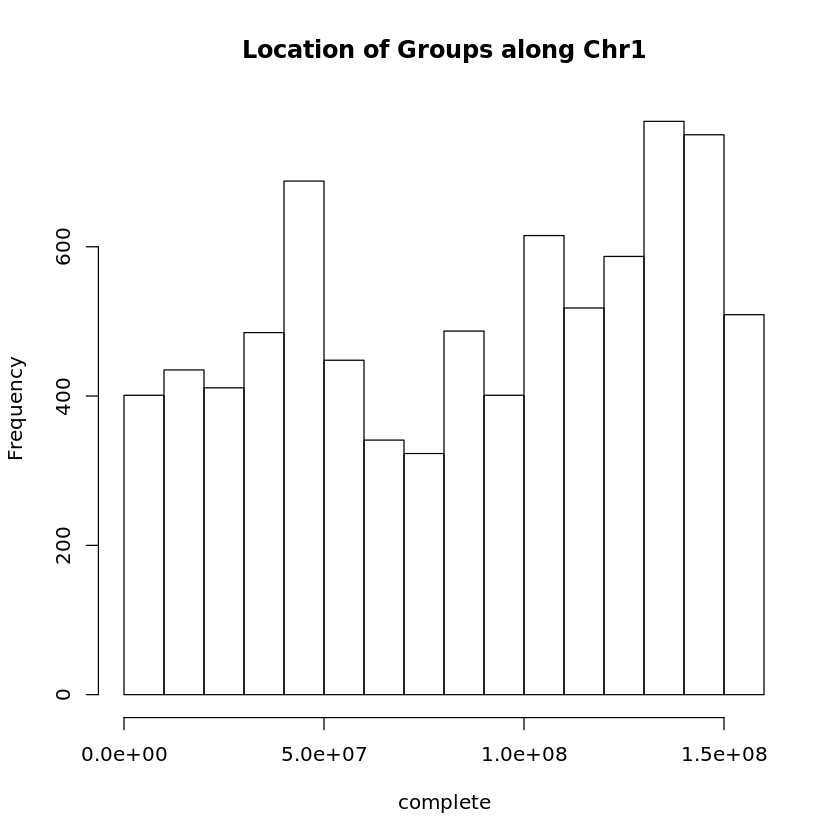

In [13]:
hist(complete, main = "Location of Groups along Chr1")

In [14]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
grouping <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
54687,chr4_3115000,3114900,53,0,0
54688,chr4_3115100,3115000,39,0,0
54689,chr4_3115200,3115100,51,0,0
55197,chr4_3193500,3193400,45,8,0
55198,chr4_3193600,3193500,24,7,0
55256,chr4_3199900,3199800,41,29,12
55258,chr4_3200000,3199900,71,26,15
55505,chr4_3224000,3223900,7,2,0
55506,chr4_3224100,3224000,182,85,26
55704,chr4_3240800,3240700,339,136,47


In [15]:
paste("Total number of bins grouped:", nrow(grouping))

[1] "Total number of bins grouped: 8167"

In [16]:
library(ggplot2)

In [17]:
pre.row <- grouping[1,]

part <- data.frame()
part <- rbind(part, pre.row)

counter = 1
sep.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        part <<- rbind(part, data.frame(binID = c(paste("gap", counter)), 
                                        start = c(0), high = c(100), medium = c(100), low = c(100)))
        counter <<- counter + 1
    }
    part <<- rbind(part, row)
    pre.row <<- row
}

invisible(apply(grouping[-1,], 1, sep.fun))

In [18]:
part[20:60,]

,binID,start,high,medium,low
20,chr4_3256400,3256300,39,19,0
21,chr4_3256500,3256400,117,56,9
110,gap 7,0,100,100,100
23,chr4_3256900,3256800,49,22,0
24,chr4_3257000,3256900,142,41,0
25,chr4_3257100,3257000,198,8,0
26,chr4_3257200,3257100,339,10,0
112,gap 8,0,100,100,100
28,chr4_3266300,3266200,98,31,8
29,chr4_3266400,3266300,83,41,16


In [19]:
head(part)
tail(part)

,binID,start,high,medium,low
54687,chr4_3115000,3114900,53,0,0
2,chr4_3115100,3115000,39,0,0
3,chr4_3115200,3115100,51,0,0
1,gap 1,0,100,100,100
5,chr4_3193500,3193400,45,8,0
6,chr4_3193600,3193500,24,7,0


,binID,start,high,medium,low
14485,gap 3869,0,100,100,100
120331,chr4_156214100,156214000,121,6,0
120341,chr4_156214200,156214100,62,3,0
14486,gap 3870,0,100,100,100
120361,chr4_156249200,156249100,84,74,11
120371,chr4_156249300,156249200,9,3,0


In [20]:
write.csv(part, "chr4_B_group.csv")

[1] "Total Number of groups: 3871"

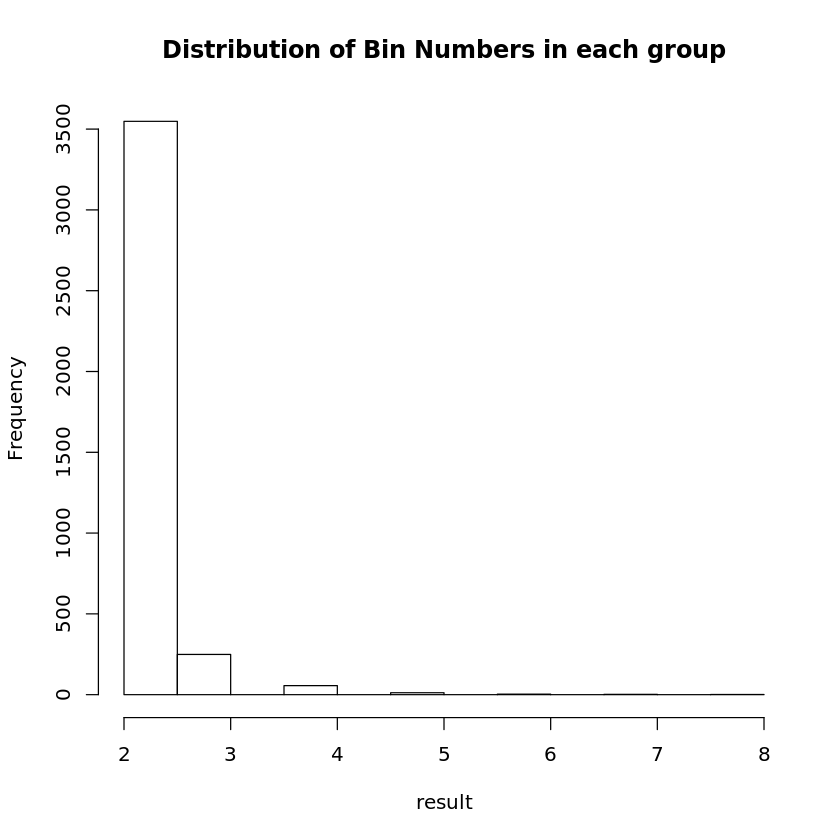

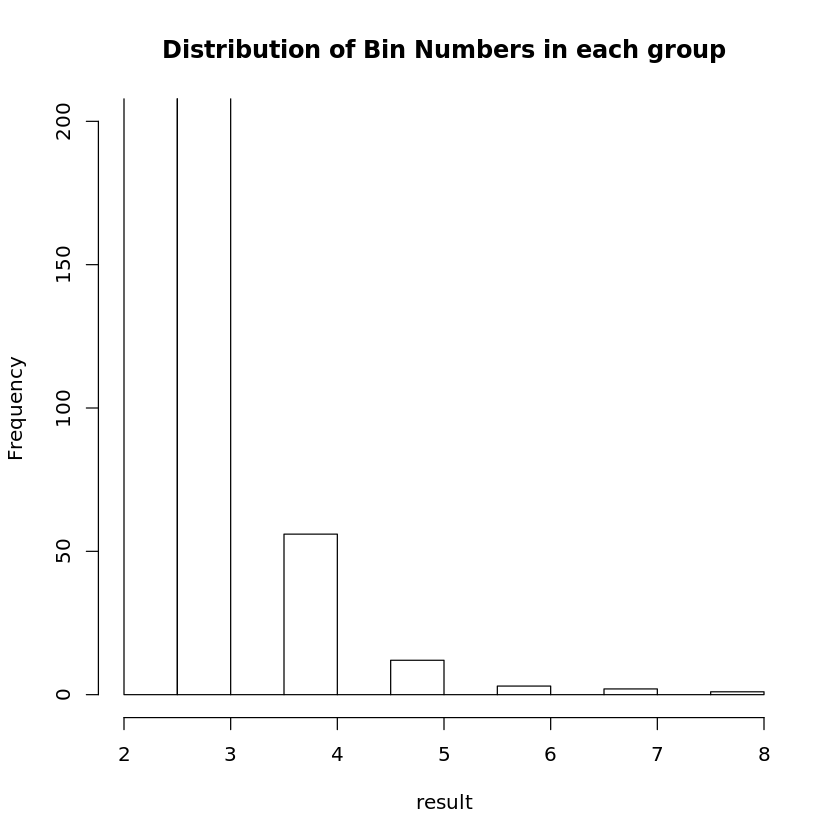

In [21]:
count = 0
result = c()
for (row in 1:nrow(part)) {
    if (substr(as.character(part[row, "binID"]), 1, 3) != "gap") {
        count = count + 1
    } else {
        result = c(result, count)
        count = 0
    }
}

result = c(result, count)

paste("Total Number of groups:", length(result))
hist(result, main = "Distribution of Bin Numbers in each group")
hist(result, ylim = c(0, 200), main = "Distribution of Bin Numbers in each group")

In [22]:
# plotdf <- data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,3])), cata = c(3))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,4])), cata = c(4)))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,5])), cata = c(5)))


# plotdf

In [23]:
# for (i in 2:nrow(part)){
#     if (substr(as.character(part[i,1]),1,3) == "gap"){
#         plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(100), cata = c(1)))
#     } else {
#         for (j in 3:5){
#             plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(as.numeric(as.character(part[i,j]))), cata = c(j)))
#         }
#     }
    
# }

# head(plotdf, 10)

In [24]:
# plotdf$cata <- factor(plotdf$cata, levels = c(3,4,5,1), labels = c("high", "medium", "low", "gap"))

# head(plotdf,100)

In [25]:
# plotdf$bin_ID <- factor(plotdf$bin_ID, levels = unique(plotdf$bin_ID))

In [26]:
# plotdf$per <- as.numeric(as.character(plotdf$per))

In [27]:
# names(plotdf) <- c("bin_ID", "count", "cata")

In [28]:
# ggplot(data = plotdf, aes(x = bin_ID, y = count, fill = factor(cata))) + coord_flip() + 
#   geom_bar(stat = "identity", width = 2) + ylim(0, 300) + scale_fill_brewer(palette="Spectral")

In [29]:
# zoomindf <- head(plotdf, 200)
# ggplot(data = zoomindf, aes(x = bin_ID, y = count, fill = factor(cata))) + 
#   geom_bar(stat = "identity") + ylim(0, 500) + scale_fill_brewer(palette="Spectral")